# 2. Working with Data
ImgSPEC allows users to work with data from a variety of sources, both local and remote, and provides integrations with familiar imaging spectroscopy tools and services like the Earth Data Search (back-ended by ImgSPEC's own Common Metadata Repository or CMR), EcoSIS (a library of spectral data), and EcoSML (a library of data models and algorithms).

### Upload Local Files to Workspace
The ImgSPEC file browser let's users add their own data directly to the workspace using the File Browser:
1. Using the File Browser, navigate to the folder where you want to upload your file.
2. Click the "Upload Files" icon
3. Select your file from your local filesystem and click "Open".

### Use Earth Data Search to Find and Get Imaging Spectroscopy Data
ImgSPEC uses its own copy of the NASA Common Metadata Repository (CMR) and Earth Data Search to store and share files on the ImgSPEC platform.  Using this repository, users can access:
1. Data sets that have been imported from other repositories or DAACs
2. Data sets that have been generated by other ImgSPEC users and published to the CMR.

#### Browse the Earth Data Search
1. From the top menu bar, select `Data Search -> Open EarthData Search`
2. Use the Earth Data Search GUI to locate data sets (called "Collections") and acquistions or flight lines (called "Granules").

#### Copy/Paste Links to Data into Notebook
1. Search for granules in the Earth Data Search, then return to this notebook.
2. Select `Data Search -> Paste Granule Search Results` and the links to the data you searched for will be added to the notebook.

#### Copy/Paste Search Query into Notebook
In some cases, the searched for data set may be very large and you may want a more programmatic way of working with the search results.  To do this, we will use a helper Python library called "MAAP" which provides functions for interacting with the ImgSPEC APIs.

First, we need to import and initialize an instance of the "MAAP" class.

In [1]:
# Import and initialize MAAP class
from maap.maap import MAAP
maap = MAAP(not_self_signed=False)

# Import warnings module and ignore warnings in output below for cleaner responses
import warnings
warnings.filterwarnings("ignore")

Next, we do the following:
1. Search for granules in the Earth Data Search, then return to this notebook.
2. Select `Data Search -> Paste Granule Search Query` and the links to the data you searched for will be added to the notebook.

Now that we have the search query, we can use its results in a block of code that performs some function on the data.  The following code just lists the file name and download URL of each granule, but if we wanted, we could also perform some analysis on this data.  And that's where ImgSPEC's scalable data processing back-end comes into play (more on this later).  

In [3]:
for g in granules:
    # Print the GranuleUR which is the unique flight line identifier
    print(f"{g['Granule']['GranuleUR']}: {g.getDownloadUrl()}")

ABoVE_Airborne_AVIRIS_NG.ang20180819t010027.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t010027.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t010027rfl.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t010027rfl.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t004028rfl.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t004028rfl.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t004028.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t004028.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t002232.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t002232.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t002232rfl.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/ang20180819t002232rfl.tar.gz
ABoVE_Airborne_AVIRIS_NG.ang20180819t000224rfl.tar.gz: https://daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRI

#### Copy Earth Data into Workspace
Using one of the URLs from above or any from the Earth Data Search, we can copy a granule into our workspace and use the code from the previous notebook to plot it.

First we copy the data to the workspace and unzip it:

In [1]:
!wget https://geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com/null/hytools_ubuntu/imgspec-merge/2021/9/9/ang20190718t160729_rfl_topo_brdf_Nitrogen/ang20190718t160729_rfl_topo_brdf_Nitrogen.tar.gz
!tar xzvf ang20190718t160729_rfl_topo_brdf_Nitrogen.tar.gz

--2021-10-14 16:53:14--  https://geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com/null/hytools_ubuntu/imgspec-merge/2021/9/9/ang20190718t160729_rfl_topo_brdf_Nitrogen/ang20190718t160729_rfl_topo_brdf_Nitrogen.tar.gz
Resolving geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com (geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com)... 52.218.212.33
Connecting to geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com (geospec-dataset-bucket-dev.s3.us-west-2.amazonaws.com)|52.218.212.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15421254 (15M) [application/x-gzip]
Saving to: ‘ang20190718t160729_rfl_topo_brdf_Nitrogen.tar.gz.1’

ang20190718t160729_ 100%[===================>]  14.71M  95.7MB/s    in 0.2s    

2021-10-14 16:53:15 (95.7 MB/s) - ‘ang20190718t160729_rfl_topo_brdf_Nitrogen.tar.gz.1’ saved [15421254/15421254]

ang20190718t160729_rfl_topo_brdf_Nitrogen/
ang20190718t160729_rfl_topo_brdf_Nitrogen/ang20190718t160729_rfl_topo_brdf_Nitrogen
ang2019

Then run the code, using the unzipped trait map file:

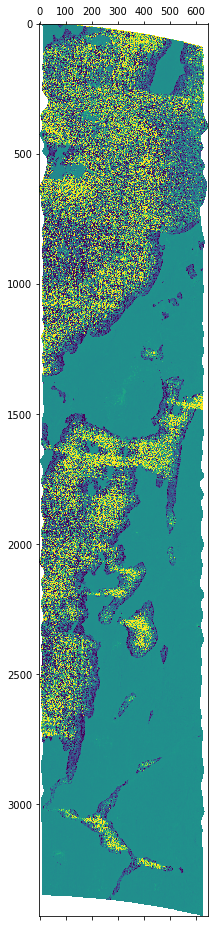

In [1]:
# Imports for HyTools
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Select trait map file to plot
envi_image= "ang20190718t160729_rfl_topo_brdf_Nitrogen/ang20190718t160729_rfl_topo_brdf_Nitrogen"

# Use HyTools to get band 0 from trait map
envi = ht.HyTools()
envi.read_file(envi_image,'envi')
band = envi.get_band(0)
band = np.copy(band)
band[~envi.mask['no_data']] = np.nan

bottom = np.nanpercentile(band,5)
top = np.nanpercentile(band,95)
plt.matshow(band,vmin=bottom,vmax=top)

### Use EcoSIS to Find and Get Spectral Data
ImgSPEC is integrated with a library of spectral data called EcoSIS.  You can browse and view spectral packages on EcoSIS and import data directly into your workspace

#### Browse Spectra on EcoSIS
1. From the top menu bar, select `EcoSIS Search -> Open EcoSIS`
2. Use the EcoSIS UI to browse, search, and preview spectra.

#### Copy Spectral Package into Workspace
1. Switch to the EcoSIS tab and locate a spectral package.
2. Select `EcoSIS Search -> Import Seelcted Spectra Package` and the spectra will be copied into your workspace's top-level directory.

Now that the spectra have been copied to your workspace, you can plot them using a bit of Python code:

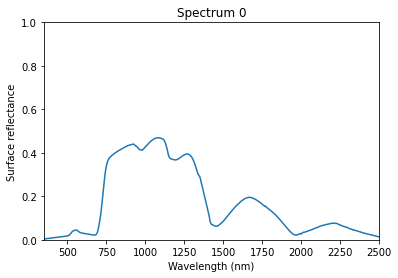

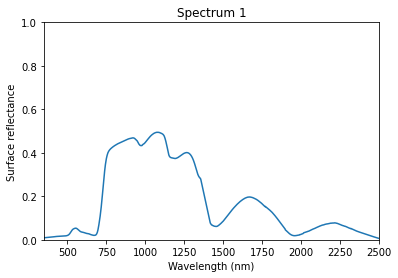

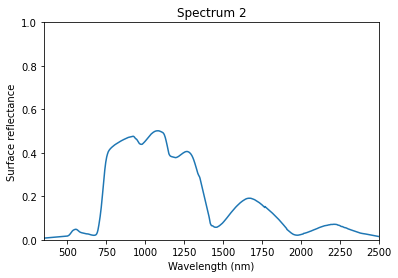

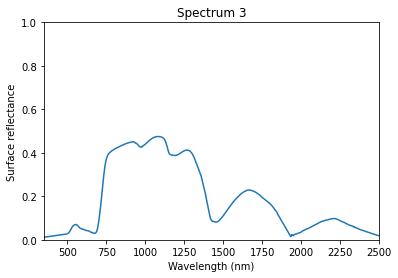

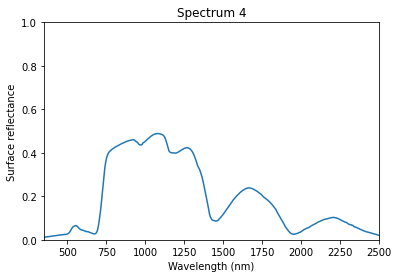

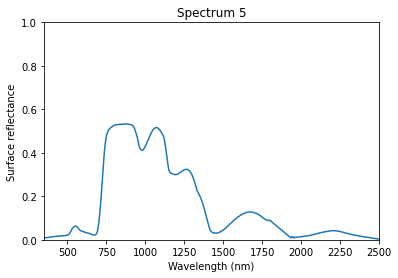

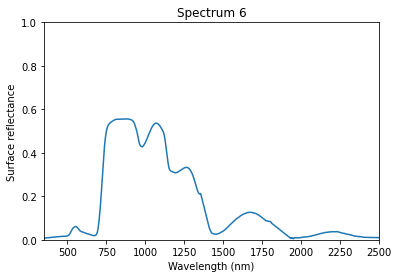

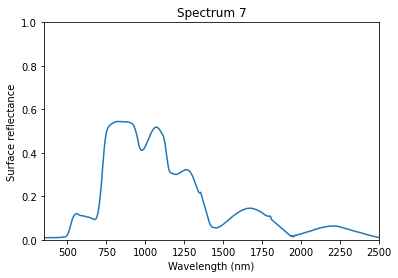

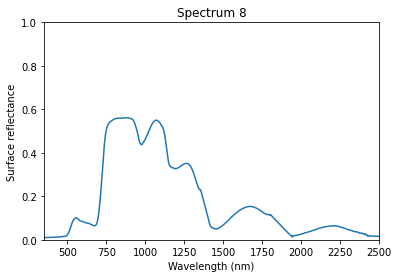

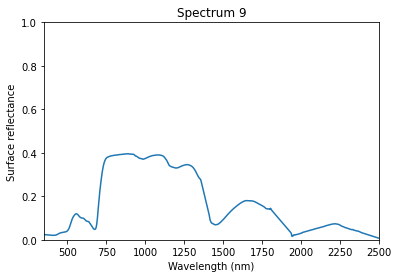

In [5]:
import numpy as np
import pylab as plt

wavelength_file = "/projects/wavelengths.txt"
spectral_file = "/projects/emit-manually-adjusted-vegetation-reflectance-spectra.csv"

wavelengths = np.loadtxt(wavelength_file)
spectra = np.loadtxt(spectral_file, delimiter=",", skiprows=1)

for i in range(10):
    plt.figure()
    plt.cla()
    plt.plot(wavelengths, spectra[i])
    plt.xlim([350,2500])
    plt.ylim([0,1.0])
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Surface reflectance")
    plt.title(f"Spectrum {i}");

### Use EcoSML to Find and Get Trait Models
ImgSPEC is also integrated with EcoSML, which is at its core a repository of repositories.  These repositories can include data like trait models, and they can also include code to analyze data.  For this section we will look at an example of importing a repository that contains a set of trait models.

#### Browse Repositories on EcoSML
1. From the top menu bar, select `EcoSML Search -> Open EcoSML`
2. Use the EcoSML UI to browse repositories

#### Copy EcoSML Repository to Workspace
1. Switch to the EcoSML tab and locate a repository to import
2. Select `EcoSML Search -> Import Selected Model Package` and the repository will be copied into your workspace's top-level directory.

NOTE: You will see a notification that says "Unable to verify algorithm".  Some EcoSML repositories that have been configured to run as executable containers on ImgSPEC will get automatically registered in the algorithm store.  We'll discuss more about this later.